In [2]:
%load_ext autoreload
%autoreload 2
import sys, os
sys.path.insert(0, os.path.abspath('../src'))
from shallowwater import (ModelParams, make_grid, setup_initial_state, 
                          tidal_potential_forcing,run_model, compute_dt_cfl,animate_eta)
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# --- Tidal test case: equilibrium tide forcing via variable geopotential ---

Nx, Ny = 128, 128
Lx, Ly = 4.0e6, 4.0e6
grid = make_grid(Nx, Ny, Lx, Ly)

# Barotropic tide on (almost) f-plane; friction mild (optional)
params = ModelParams(H=4000.0, g=9.81, rho=1025.0,
                     f0=1e-4, beta=0.0, y0=Ly/2,
                     r=1/(15*86400),   # ~15-day e-fold (optional; set 0.0 for inviscid)
                     linear=True)

dt = compute_dt_cfl(grid, params, cfl=0.5)
tmax = 3 * 24 * 3600.0   # 3 days covers multiple M2 cycles

# Start from rest
ic_fn = lambda g, p: setup_initial_state(g, p, mode='rest')

# Equilibrium tide: spatially uniform (standing) or plane wave if you set kx/ky
forcing_fn = lambda t, g, p: tidal_potential_forcing(
    t, g, p,
    amp_eta_eq=0.20,  # 20 cm deep-ocean amplitude for visibility
    omega=None,       # default M2
    phase=0.0,
    kx=2*np.pi / (20000e3), ky=0.0    # set kx>0 for a traveling equilibrium tide across the basin
)

# Save often enough to resolve the 12.42h cycle
out = run_model(tmax, dt, grid, params, forcing_fn, ic_fn,
                save_every=30, out_vars=('eta',))

print('Saved steps:', len(out['time']))


Saved steps: 110


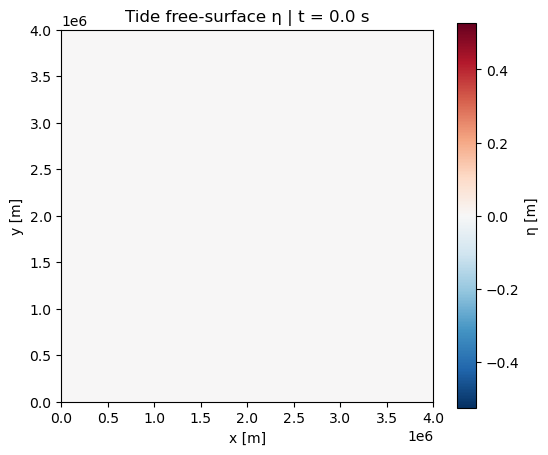

In [3]:
# Quick look animation (if you added visualize.py earlier)
from shallowwater.visualize import animate_eta

anim = animate_eta(out, grid, interval=60, title="Tide free-surface η")

# GIF (no external dependencies)
anim.save("eta_04.gif", fps=10)

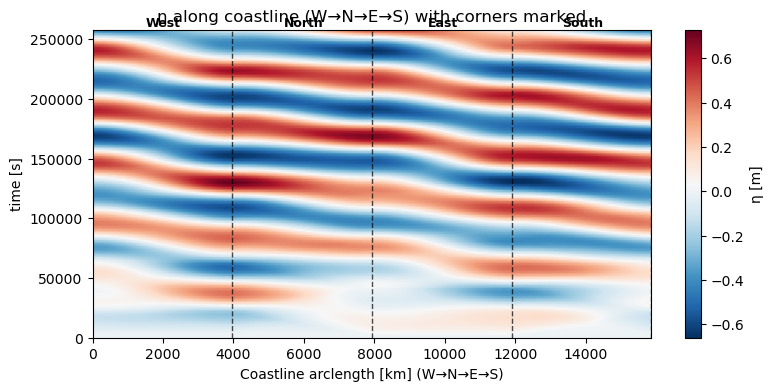

In [5]:
from shallowwater.visualize import coast_hovmoller

fig = coast_hovmoller(out, grid, units_x="km",
                      title="η along coastline (W→N→E→S) with corners marked")

### No rotation

In [3]:
# --- Tidal test case: equilibrium tide forcing via variable geopotential ---

Nx, Ny = 128, 128
Lx, Ly = 4.0e6, 4.0e6
grid = make_grid(Nx, Ny, Lx, Ly)

# Barotropic tide on (almost) f-plane; friction mild (optional)
params = ModelParams(H=4000.0, g=9.81, rho=1025.0,
                     f0=0.0, beta=0.0, y0=Ly/2,
                     r=1/(15*86400),   # ~15-day e-fold (optional; set 0.0 for inviscid)
                     linear=True)

dt = compute_dt_cfl(grid, params, cfl=0.5)
tmax = 3 * 24 * 3600.0   # 3 days covers multiple M2 cycles

# Start from rest
ic_fn = lambda g, p: setup_initial_state(g, p, mode='rest')

# Equilibrium tide: spatially uniform (standing) or plane wave if you set kx/ky
forcing_fn = lambda t, g, p: tidal_potential_forcing(
    t, g, p,
    amp_eta_eq=0.20,  # 20 cm deep-ocean amplitude for visibility
    omega=None,       # default M2
    phase=0.0,
    kx=2*np.pi / (20000e3), ky=0.0    # set kx>0 for a traveling equilibrium tide across the basin
)

# Save often enough to resolve the 12.42h cycle
out = run_model(tmax, dt, grid, params, forcing_fn, ic_fn,
                save_every=30, out_vars=('eta',))

print('Saved steps:', len(out['time']))


Saved steps: 110


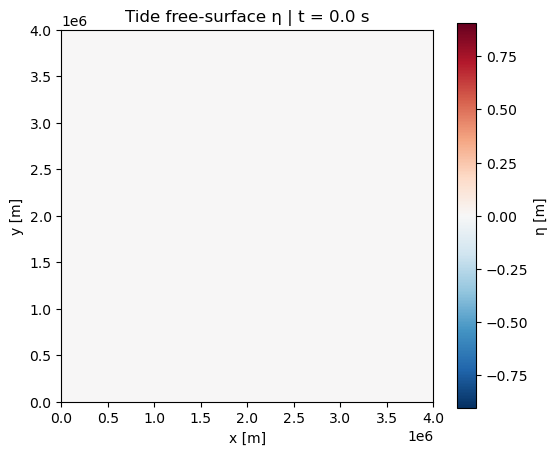

In [4]:
# Quick look animation (if you added visualize.py earlier)
from shallowwater.visualize import animate_eta

anim = animate_eta(out, grid, interval=60, title="Tide free-surface η")

# GIF (no external dependencies)
anim.save("eta_04b_no_rotation.gif", fps=10)